# Chapter 10. Introduction_to_Artificial_Neural_Networks

Artificial neural networks (ANNs) draw inspiration from the brain's architecture to construct intelligent machines. These networks, while initially conceived as models resembling biological neurons, have evolved considerably from their natural counterparts. The resemblance has even sparked debates about whether to retain the biological analogy in terminology. 

ANNs, at the heart of Deep Learning, prove highly versatile and scalable, perfectly suited for handling complex tasks such as image classification, speech recognition, recommendation systems, and strategic game playing. This chapter introduces ANNs, tracing their historical development from early architectures to contemporary Multilayer Perceptrons (MLPs) and demonstrates how to implement neural networks using the Keras API, a powerful and expressive tool for building a variety of neural network architectures.

The journey of ANNs dates back to 1943, initiated by Warren McCulloch and Walter Pitts, who introduced the first artificial neural network architecture. Despite initial excitement, ANNs faced setbacks and entered periods of dormancy. However, recent advancements have reignited interest in ANNs due to the availability of vast training data, increased computing power, improved training algorithms, and a more nuanced understanding of their limitations. 

ANNs have begun to demonstrate their potential across various applications, promising a significant impact on our lives driven by a virtuous cycle of funding, progress, and remarkable products. The chapter also provides insights into biological neurons' structure and function, highlighting the foundational inspiration for artificial neural networks.

### Logical Computations with Neurons

Logical computations with artificial neurons, as originally conceptualized by McCulloch and Pitts, are based on a simplified model of biological neurons. These artificial neurons have binary inputs and a binary output, with activation occurring when a predefined number of inputs are active. The process can be summarized in several steps:

- Model Overview: Artificial neurons mimic biological neurons with binary (on/off) inputs and outputs.

- Universal Computations: McCulloch and Pitts demonstrated that networks of these artificial neurons can compute any logical proposition.

- Network Illustrations: Several example networks performing logical computations are presented:

   - Identity Function: Neuron C is activated if neuron A is active.

   - Logical AND: Neuron C is activated only when both neurons A and B are active.

   - Logical OR: Neuron C is activated if either neuron A or neuron B is active, or both.

   - Complex Logic (with inhibition): Neuron C is activated only if neuron A is active and neuron B is inactive. This represents a logical NOT operation when neuron A is active all the time.

Combinatorial Potential: These simple networks can be combined to compute complex logical expressions, enabling the construction of more intricate computational models.

This demonstrates how basic artificial neurons can perform fundamental logical operations, paving the way for constructing more sophisticated neural networks capable of handling complex tasks and computations.

### Perceptron

The Perceptron, a foundational artificial neural network (ANN) architecture invented by Frank Rosenblatt in 1957, introduces a simplified model known as a threshold logic unit (TLU). Here's a step-by-step summary of key concepts:

- TLU Basics: The TLU computes a weighted sum of its inputs, applies a step function to the sum, and produces an output.

- Step Functions: Common step functions used in Perceptrons include the Heaviside step function and the sign function.

- Single TLU for Linear Binary Classification: A single TLU can perform simple linear binary classification by comparing the weighted sum of inputs to a threshold. If the sum exceeds the threshold, the positive class is output; otherwise, the negative class is output.

- Perceptron Structure: A Perceptron consists of a single layer of TLUs, where each TLU is fully connected to all inputs. The inputs include special passthrough neurons known as input neurons, and an extra bias feature (x = 1) is typically included using a bias neuron. This structure enables multioutput classification.

- Matrix Representation: The output of a fully connected layer of artificial neurons can be efficiently computed for multiple instances using matrix multiplication, simplifying calculations.

- Perceptron Training: The Perceptron is trained using a learning rule inspired by Hebb's rule. For each training instance, it makes predictions, and for any incorrect predictions, it reinforces the connection weights from inputs that would have led to the correct prediction. The learning rate (η) controls the magnitude of weight adjustments.

- Linear Decision Boundaries: The Perceptron's decision boundaries are linear, limiting its capability to learn complex patterns. However, it can converge to a solution if the training data is linearly separable, as demonstrated by the Perceptron convergence theorem.

In summary, the Perceptron is a foundational ANN architecture used for linear binary classification tasks. While its capabilities are limited to linear decision boundaries, it serves as a fundamental building block for more complex neural networks and can be employed using libraries like Scikit-Learn for various classification tasks.

In [1]:
# SETUP

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

2023-09-02 21:42:32.594567: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

/var/folders/47/ghgms_bn3kbc05gqnc15ny_c0000gn/T/ipykernel_91669/3295362500.py:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris.target == 0).astype(np.int)


In [3]:
y_pred


array([1])

Saving figure perceptron_iris_plot


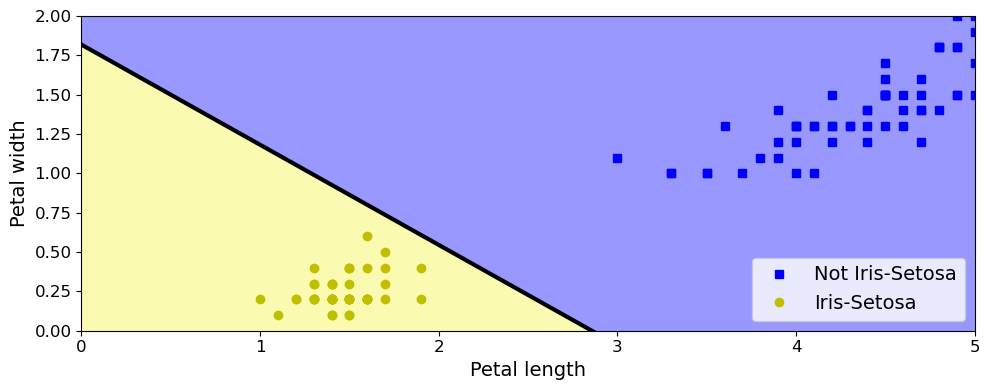

In [4]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

save_fig("perceptron_iris_plot")
plt.show()

In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

The Multilayer Perceptron (MLP) represents a significant advancement in neural network architecture, introducing the concept of multiple layers, hidden layers, and the backpropagation training algorithm. Here's a step-by-step summary:

MLP Architecture: An MLP consists of several layers, including an input layer, one or more hidden layers composed of TLUs (threshold logic units), and an output layer. Each layer, except the output layer, incorporates a bias neuron and is fully connected to the subsequent layer. This architecture is an example of a feedforward neural network (FNN), with signal flow occurring only from inputs to outputs.

Deep Neural Networks (DNNs): When an ANN contains multiple hidden layers, it's referred to as a deep neural network (DNN). DNNs are a fundamental focus of Deep Learning, although the term "Deep Learning" is often used colloquially even for networks with just a few hidden layers.

Backpropagation Algorithm: The backpropagation training algorithm, introduced in 1986 by Rumelhart, Hinton, and Williams, is a key breakthrough in training MLPs. It leverages Gradient Descent to adjust connection weights efficiently and is underpinned by the automatic computation of gradients, known as automatic differentiation.

Training Process: The training process involves several steps:

Mini-Batch Processing: The algorithm operates on mini-batches of training instances (e.g., 32 instances each) and iterates over the entire training dataset multiple times (epochs).

Forward Pass: Each mini-batch is processed through the network, starting from the input layer and proceeding through the hidden layers to the output layer, preserving intermediate results.

Error Measurement: The algorithm calculates the error between the predicted outputs and the desired outputs using a specified loss function.

Gradient Computation: It computes the contribution of each output connection to the error and then calculates how much of these error contributions originate from each connection in the layer below, using the chain rule. This reverse pass effectively measures the error gradient across all connection weights in the network.

Gradient Descent Step: Finally, the algorithm performs a Gradient Descent step to adjust the connection weights based on the computed error gradients, and this process repeats until the network converges.

Activation Functions: Activation functions play a crucial role in MLPs, introducing nonlinearity to the network. The backpropagation algorithm works well with various activation functions, including the logistic (sigmoid) function, hyperbolic tangent function, and Rectified Linear Unit (ReLU) function. These functions allow MLPs to model complex relationships and solve intricate problems that linear transformations alone cannot address.

In summary, the Multilayer Perceptron (MLP) introduces multiple layers, hidden layers, and the backpropagation training algorithm, revolutionizing neural network capabilities. The activation functions used in MLPs enable them to capture complex patterns and solve a wide range of problems, making them a fundamental building block in modern Deep Learning.

Saving figure activation_functions_plot


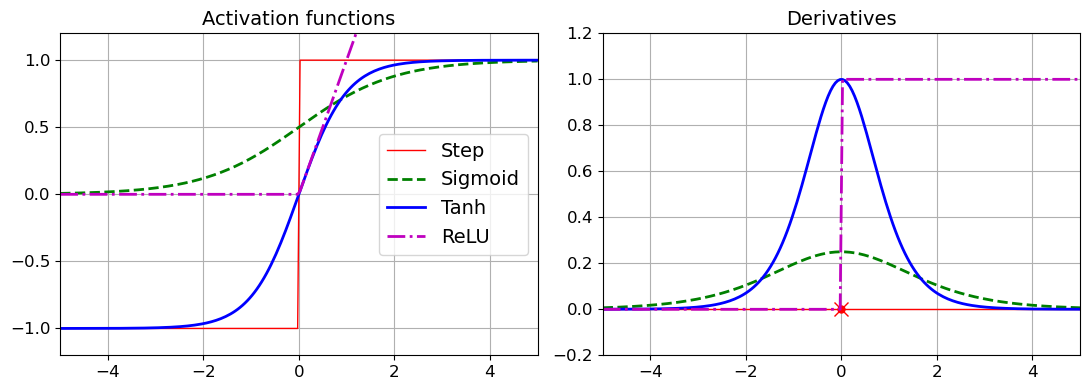

In [6]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

save_fig("activation_functions_plot")
plt.show()

In [7]:
def heaviside(z):
    return (z >= 0).astype(z.dtype)

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

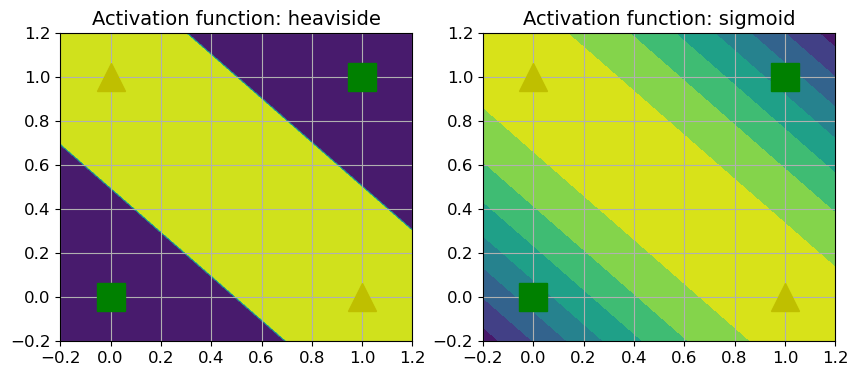

In [8]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)

In [9]:
import tensorflow as tf
from tensorflow import keras

### Building an image classifier

Building an image classifier using the Sequential API in Keras involves several key steps, summarized below:

Dataset Loading: In this example, we are working with the Fashion MNIST dataset, which is similar in structure to MNIST but contains grayscale images of fashion items, making the classification task more challenging. The dataset consists of 70,000 images, each with 28x28 pixels and divided into 10 classes.

Loading Data with Keras: Keras provides utility functions for loading common datasets. In this case, we load the Fashion MNIST dataset using the fashion_mnist.load_data() function. Unlike MNIST, Fashion MNIST images are represented as 28x28 arrays with pixel intensities as integers in the range of 0 to 255.

Data Preprocessing: To prepare the data for training, we create a validation set from the training data. Additionally, since we'll be using Gradient Descent for training, we scale the pixel intensities to the range of 0 to 1 by dividing them by 255.0. This also converts the pixel values to floating-point numbers.

Class Names: For Fashion MNIST, we need a list of class names to interpret the labels. These class names correspond to different fashion items, such as "T-shirt/top," "Trouser," "Pullover," and so on. This mapping allows us to understand the meaning of each class label.

The dataset is now ready for use in training a neural network classifier. These initial steps lay the foundation for building and training an image classifier to recognize various fashion items from the Fashion MNIST dataset.